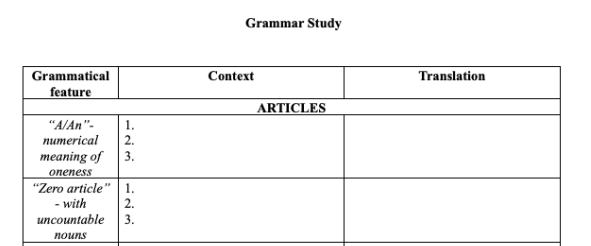

In [170]:
"""
Performance characteristics, such as response time, through- put and scalability, 
are key quality attributes of distributed applications. Current practice, however, 
rarely applies sys- tematic techniques to evaluate performance characteristics. 
We argue that evaluation of performance is particularly cru- cial in early development stages, 
when important architec- tural choices are made. At first glance, this contradicts the use of 
testing techniques, which are usually applied to- wards the end of a project. In this paper, 
we assume that many distributed systems are built with middleware tech- nologies, such as the 
Java 2 Enterprise Edition (J2EE) or the Common Ob ject Request Broker Architecture (CORBA). 
These provide services and facilities whose implementations are available when architectures are defined. 
We also note that it is the middleware functionality, such as transaction and persistence services, 
remote communication primitives and threading policy primitives, that dominate distributed system performance. 
Drawing on these observations, this paper presents a novel approach to performance testing of distributed applications. 
We propose to derive application- specific test cases from architecture designs so that perfor- mance of a distributed 
application can be tested using the middleware software at early stages of a development pro- cess. We report empirical 
results that support the viability of the approach. print me only the sentence 

from this text which has an articles A/An- numerical meaning of oneness
"""

'\nPerformance characteristics, such as response time, through- put and scalability, \nare key quality attributes of distributed applications. Current practice, however, \nrarely applies sys- tematic techniques to evaluate performance characteristics. \nWe argue that evaluation of performance is particularly cru- cial in early development stages, \nwhen important architec- tural choices are made. At first glance, this contradicts the use of \ntesting techniques, which are usually applied to- wards the end of a project. In this paper, \nwe assume that many distributed systems are built with middleware tech- nologies, such as the \nJava 2 Enterprise Edition (J2EE) or the Common Ob ject Request Broker Architecture (CORBA). \nThese provide services and facilities whose implementations are available when architectures are defined. \nWe also note that it is the middleware functionality, such as transaction and persistence services, \nremote communication primitives and threading policy primi

In [171]:
patterns = {
    "ARTICLES" : {              
        'A/An- numerical meaning of oneness': r'\b(a|an)\b',
        'Zero article - with uncountable nouns': r'\b(advice|information|water|rice|knowledge|money|bread|butter|electricity|gas|music|art)\b',
        'A/An- generic function':r'\b(a|an) . *is .*\w+',
        'Zero article - generic function': r'(?<!\bthe\b )(?<!\ba\b )(?<!\ban\b )\b. *is .*\w+',
        'The- generic function':r'\bthe .* is .*\w+',
        'A/An- first mention + The - second mention':r'\b(a|an)\b.*\bthe\b',
        'A/An- when modified by a descriptive attribute':r'\b(a|an) \w+ \w+',
        'The- when modified by a limiting attribute': r'\bthe (same|most|best|biggest|smallest|oldest|youngest) (\w+)\b',
        'The - unique objects and notions': r'\bthe (\b[A-Z][a-z]*\b|\b[A-Z]+\b)( [A-Z][a-z]*\b)*',
        'The by reason of locality': r'\bthe \w+',
        'The when followed by an ordinal number': r'\bthe (first|second|third|fourth|fifth|sixth|seventh|eighth|ninth|tenth|[0-9]+(st|nd|rd|th))\b',
        'Zero article when the noun is followed by a cardinal number': r'\b([0-9]+) (\w+s)\b',
    },
    "ACTIVE VOICE" :  {
        'Present Simple': r'\w+es\b',
        'Present Continuous': r'\b(is|are) \w+ing\b',
        'Present Perfect': r'\b(has|have) \b(\w+)',
        'Present Perfect Continuous': r'\b(has|have been) \b(\w+)',
        'Past Simple': r'\w+ed\b',
        'Past Continuous': r'\b(was|were) .*\w+ing\b',
        'Past Perfect': r'\bhad .*\w+ed\b',
        'Future Simple': r'\bwill \w+\b(?! be\b)',
        'Future Perfect': r'\bwill .*have\b',
    },
    "PASSIVE VOICE" : {
        'Passive Voice (Present Simple)': r'\b(is|are) \w+ed\b',
        'Passive Voice (Present Continuous)': r'\b(is|are)\b .*being\b',
        'Passive Voice (Present Perfect)': r'\b(has|have) been \w+ed\b',
        'Passive Voice (Past Simple)': r'\b(was|were) \w+ed\b',
        'Passive Voice (Past Perfect)': r'\bhad been .*\w+ed\b',
        'Passive Voice (Future Simple)': r'\bwill be \w+ed\b|will be\b',
    },
    "VERBALS" : {
        'Infinitive as a Subject or Attribute': [r'^It is .* to \w+.*', r'^To \w+.*'],
        'Infinitive as a Predicate': [r'.* is|was to \w+.*', r'^Does he .* \w+ \?', r'(should|should not|can|can not) \w+'],
        'Infinitive as an Adverbial Modifier': [r'.* enough to \w+.*', r'.* in order to \w+.*', r'.* too \w+ to \w+.*'],
        'Complex Object with Infinitive': [r'.* (want|wish|desire|mean|intend|choose|like|dislike|love|hate|think|believe|consider|expect|imagine|find|suppose|know|realize|declare|pronounce|proclaim|report|order|allow|suffer|permit|forbid|command|request|tell|ask) .* to \w+.*',
                                            r'.* (see|hear|feel|watch|observe|notice|make|let|have) \w+.*'],
        'Complex Subject with Infinitive': [r'^(It .*|To \w+).* to \w+.*', r'\b(was|were) (seen|heard|noticed) .* to \w+.*', 
                                            r'\b(is|was|are|were) (announced|known|said|stated|reported|thought|to do|to go|to) .*'],
        'Gerund as a Subject': [
            r'\b\w+ing\s+(is|are)\b',
            r'\b\w+ing\s+[^ ]*s\b',
        ],
        'Gerund as an Adverbial Modifier': [
                r'\b(on|after|before|in|since|by)\s+\w+ing\b',
                r'\b(because of|through|for|from|from fear of|on account of)\s+\w+ing\b',
                r'\b(instead of|rather than|than|better than|worse than|as ... as)\s+\w+ing\b',
                r'\b(in spite of|despite)\s+\w+ing\b',
                r'\b(without|except for)\s+\w+ing\b',
            ],
        'Gerund as an Object (after preposition)': [
                r'\b(to\s+)?(admit|appreciate|deny|dislike|enjoy|fancy|imagine|mention|miss|mind|risk|suggest)(ed)?\s+.*\w+ing\b',
                r'\b(can\'t help|can\'t stand|need|want|to be worth|require|deserve)\s+.*\w+ing\b',
                r'\b(to\s+)?(suspect someone of|object to|look forward to|rely on|insist on|succeed in|apologize for|thank someone for)(ed)?\s+.*\w+ing\b',
                r'\b(to be afraid|to be capable|to be sure|to be fond of|to be aware of|to be tired of|to be used to|to be interested in|to be good at|to prevent someone from)\s+.*\w+ing\b',
            ],
        'Gerund after Verbs': [
                r'\b(like|love|hate|dislike|detest|can\'t stand|give up|end up|begin|prefer|continue|start|finish|plan|neglect|remember|mean|stop|forget|try|regret|acknowledge|admit to|advise|approve of|allow|anticipate|appreciate|avoid|be worth|begin|explain|fancy|feel like|finish|forbid|forgive|hate|imagine|involve|justify|keep|mention|mind|miss|need|neglect|permit|picture|postpone|practise|prefer|prevent|propose|recollect|worry about)\s+.*\w+ing\b'
            ],
        'Gerundial Complex':[r'\b\w+(ed|ing)\b'], 
                
        'Participle as an Attribute': [r'\b\w+(ed|ing)\b'], 
        'Participle as an Adverbial Modifier':[r'\b(if|unless)\s+\w+(ed|ing)\b|(?<!\baccording to\s)\b\w+ing\b\s+to\b'], 
        'Absolute Participial Construction':[r'\bhaving\s+.*\w+ed,\b|\b\w+(ing|ed),\b'], 
        'Complex Object with the Participle':[r'\b(see|watch|observe|notice|hear|feel|sees|watches|observes|notices|hears|feels|seed|watched|observed|noticed|heard|feeled)\s+\w+\s+\w+(ing|ed)\b',
                                                r'\b(see|hear|notice|feel|watch|want|wish|desire|prefer|like|consider|believe|discover|find|sees|hears|notices|feels|watches|wants|wishes|desires|prefers|likes|considers|believes|discovers|finds|seed|heard|noticed|feeled|watched|wanted|wished|desired|preferred|liked|considered|believed|discovered|founded)\s+\w+\s+\w+(ing|ed)\b'], 

        'Complex Subject with the Participle':[r'\b(is|was|are|were)\s+(heard|kept|saw|hearing|keeping|seeing)\s+.*\w+(ed|ing)\b'],                   
    },
    "MODAL VERBS" : {
        'Can / could / be able to': r'\b(can|could|be able to)\b',
        'May / might': r'\b(may|might)\b',
        'Must / have to': r'\b(must|have to|had to)\b',
        'Should / ought to': r'\b(should|ought to)\b',
    },
    "CONDITIONALS" : {
        'Zero Conditional': r'\bif\b.*\bhave\b',
        'I Conditional': r'\bif\b.*\bwill\b',
        'II Conditional': r'\bif\b.*\bwould\b',
        'III Conditional': r'\bif\b.*\bwould have\b',
    }
}

In [172]:
import re

In [173]:
def compile(patterns):
    patterns_compiled = {}
    for name, pattern_dict in patterns.items():
        pattern_dict_compiled = {}
        for grammatical_feature, pattern in pattern_dict.items():
            if isinstance(pattern, list):
                pattern_compiled = []
                for pat in pattern:
                    pattern_compiled.append(re.compile(pat))
                pattern_dict_compiled[grammatical_feature] = pattern_compiled
            elif isinstance(pattern, str):
                pattern_dict_compiled[grammatical_feature] = re.compile(pattern)
            else:
                print("wrong regex type")
            patterns_compiled[name] = pattern_dict_compiled
    return patterns_compiled

def find_pattern(sentence, patterns_compiled):
    exclusion_for_adverbial_modifier = ['to begin with', 'to be frank', 'to put it mildly', 'to tell the truth', 'strange to say']

    for name, pattern_dict in patterns_compiled.items():
        for grammatical_feature, pattern in pattern_dict.items():
            if isinstance(pattern, list):
                for pat in pattern:
                    if pat.search(sentence):
                        if grammatical_feature == 'Infinitive as an Adverbial Modifier':
                            if any(exclusion in sentence for exclusion in exclusion_for_adverbial_modifier):
                                continue  # Exclusion found, ignore this match
                        return name, grammatical_feature
            elif isinstance(pattern, re.Pattern):
                if pattern.search(sentence):
                    if grammatical_feature == 'Infinitive as an Adverbial Modifier':
                        if any(exclusion in sentence for exclusion in exclusion_for_adverbial_modifier):
                            continue  # Exclusion found, ignore this match
                    return name, grammatical_feature
    return None

def get_examples_struct(patterns, n=3):
    # template = {i+1 : None for i in range(0, n)}
    return {name : {grammatical_feature : {} for grammatical_feature in pattern_dict.keys()} for name, pattern_dict in patterns.items()}

examples = get_examples_struct(patterns)
patterns_compiled = compile(patterns)

def input_pattern(sentence, pattern, examples):
    name, grammatical_feature = pattern
    n_examples = len(examples[name][grammatical_feature]) + 1
    if n_examples <= 3:
        examples[name][grammatical_feature][n_examples] = sentence
    return examples

In [174]:
articles = [
    "articles/Machine Learning The High Interest Credit Card of Technical Debt.pdf",
    "articles/Attention is all you need.pdf",
    "articles/QUEACO.pdf",
    "articles/Query Rewrite for Null and Low Search.pdf",
    "articles/NER.pdf",
    "articles/NER_LENOVO.pdf",
    "articles/query rewriting.pdf",
    "articles/Auto sklearn.pdf",
    "articles/3.Verified Mathematics With the help of computational proof assistants, formal verification could become the new standard for rigor in mathematics.pdf",
    "articles/1.The Future of Software Performance Engineering.pdf",
    "articles/GPT-3.pdf",
    "articles/Chain of thoughts.pdf"
]

In [175]:
from pypdf import PdfReader
from autocorrect import Speller

In [176]:
spell = Speller(lang='en')

In [177]:
for i, article in enumerate(articles):
    print(f"processing {article}...")
    reader = PdfReader(article)
    for page in reader.pages:
        for sentence in page.extract_text().lower().replace("-\n", "").replace('\n', ' ').split("\\."):
            # print(sentence.strip(), "---->", spell(sentence.strip()), "\n")
            sentence = spell(sentence.strip())
            pattern = find_pattern(sentence, patterns_compiled)
            if pattern:
                sentence += f" [{i+1}:{page.page_number+1}]"
                examples = input_pattern(sentence, pattern, examples)
            # print(f"found {pattern} ", end='\r')
            # if re.search(word_pattern, sentence):
            # examples[word_variance] = sentence.strip() + "." + f"[{i+1}:{page.page_number+1}]"
                

processing articles/Machine Learning The High Interest Credit Card of Technical Debt.pdf...
processing articles/Attention is all you need.pdf...
processing articles/QUEACO.pdf...
processing articles/Query Rewrite for Null and Low Search.pdf...
processing articles/NER.pdf...
processing articles/NER_LENOVO.pdf...
processing articles/query rewriting.pdf...
processing articles/Auto sklearn.pdf...
processing articles/3.Verified Mathematics With the help of computational proof assistants, formal verification could become the new standard for rigor in mathematics.pdf...
processing articles/1.The Future of Software Performance Engineering.pdf...
processing articles/GPT-3.pdf...
processing articles/Chain of thoughts.pdf...


In [166]:
def recall(examples):
    filled = 0
    full = 0
    for _, grammatical_features in examples.items():
        for grammatical_feature, examples in grammatical_features.items():
            filled += len(examples)
            if len(examples) == 0:
                print(grammatical_feature)
            full += 3
    return round(filled / full, 3)
        

In [167]:
recall(examples)

A/An- generic function
A/An- first mention + The - second mention
A/An- when modified by a descriptive attribute
The - unique objects and notions
The when followed by an ordinal number
Present Perfect Continuous
Past Perfect
Future Perfect
Passive Voice (Present Simple)
Passive Voice (Present Continuous)
Passive Voice (Present Perfect)
Passive Voice (Past Simple)
Passive Voice (Past Perfect)
Passive Voice (Future Simple)
Infinitive as a Subject or Attribute
Complex Subject with Infinitive
Participle as an Attribute
Participle as an Adverbial Modifier
Absolute Participial Construction
Complex Object with the Participle
Complex Subject with the Participle
Zero Conditional
I Conditional
II Conditional
III Conditional


0.447

In [ ]:
exclusion_for_adverbial_modifier = ['to begin with', 'to be frank', 'to put it mildly', 'to tell the truth', 'strange to say']
    
    # if keyword in verbals_patterns:
    #     patterns = verbals_patterns[keyword]
    #     for pattern in patterns:
    #         if re.search(pattern, sentence):
    #             # Check for exclusions in the Infinitive as an Adverbial Modifier
    #             if keyword == 'Infinitive as an Adverbial Modifier':
    #                 if any(exclusion in sentence for exclusion in exclusion_for_adverbial_modifier):
    #                     continue  # Exclusion found, ignore this match
                
    #             return True  # Condition matched
    # return False  # Condition not matched
    
    
    
    combined_patterns = {**passive_patterns, **active_patterns, **modal_verbs_patterns, **articles_patterns, **conditional_patterns}
    # pattern = combined_patterns.get(keyword)
    # if pattern:
    #     return re.search(pattern, sentence)
    # return None
    
    # ????????? ??????? ????????? ????? ? ???????? ???????? (?? verbals_patterns)
    if keyword in combined_patterns:
        pattern = combined_patterns[keyword]
        return re.search(pattern, sentence) is not None

    # ???????? ???????????? verbals_patterns, ??? ?????? ????? ????? ??????????????? ????????? ????????
    elif keyword in verbals_patterns:
        patterns = verbals_patterns[keyword]
        for pattern in patterns:
            if re.search(pattern, sentence):
                # ????? ????? ????????? ??????????, ???? ??? ??????????
                # Check for exclusions in the Infinitive as an Adverbial Modifier
                if keyword == 'Infinitive as an Adverbial Modifier':
                    if any(exclusion in sentence for exclusion in exclusion_for_adverbial_modifier):
                        continue  # Exclusion found, ignore this match
                return True  # ??????? ?????????????

    # ???? ???? ?? ?????? ?? ? ????? ?? ????????
    return False


def find_sentences(word_list, pdf_files, output_file):
    results_dict = {word: [] for word in word_list}
    
    for pdf_file in pdf_files:
        with open(pdf_file, 'rb') as file:
            pdf_reader = PyPDF2.PdfReader(file)
            for page_number in range(len(pdf_reader.pages)):
                page = pdf_reader.pages[page_number]
                page_text = page.extract_text()
                sentences = page_text.split('. ')

                for sentence in sentences:
                    for word in word_list:
                        if check_conditions(sentence, word):
                            clean_sentence = sentence.replace('\n', '') 
                            results_dict[word].append(f'{clean_sentence} [{pdf_files.index(pdf_file)+1}: {page_number+1}]')

    #  Excel 
    max_sentences = max(len(sentences) for sentences in results_dict.values())
    columns_dict = {}
    columns_dict['Key word'] = word_list
    for i in range(max_sentences):
        column_name = f'Context {i+1}'
        columns_dict[column_name] = [sentences[i] if i < len(sentences) else '' for sentences in results_dict.values()]
    result_df = pd.DataFrame(columns_dict)

    result_df.to_excel(output_file, index=False)

# ?????? ???? ? ??????
excel_file = 'C:\\Grammar\\examples.xlsx'
output_file = 'C:\\Grammar\\output_file.xlsx'
#pdf_files = ['C:\\Grammar\\Statya_1.pdf','C:\\Grammar\\Statya_3.pdf','C:\\Grammar\\Statya_4.pdf','C:\\Grammar\\Statya_5.pdf', 'C:\\Grammar\\Article_Zamchalov.pdf']
pdf_files = ['C:\\Grammar\\Article_Zamchalov.pdf','C:\\Grammar\\Konkov_Article2.pdf','C:\\Grammar\\Konkov_Article3.pdf','C:\\Grammar\\Konkov_Article4.pdf',
             'C:\\Grammar\\Konkov_Article5.pdf','C:\\Grammar\\Konkov_Article6.pdf','C:\\Grammar\\Konkov_Article7.pdf','C:\\Grammar\\Konkov_Article8.pdf','C:\\Grammar\\Konkov_Article9.pdf']
# pdf_files = ['C:\\Grammar\\Cox Proportional-Hazards Regression for Survival Data in R.pdf',
#              'C:\\Grammar\\Coxs_Regression_Model_for_Counting_Processes_A_Large_Sample_Study.pdf',
#              'C:\\Grammar\\Empirical_analysis_of_Chinese_overseas_power_plant_investments.pdf']



df = pd.read_excel(excel_file)
word_list = df.iloc[:, 0].astype(str).tolist()
print (word_list)


find_sentences(word_list, pdf_files, output_file)


In [39]:
import pandas as pd
from googletrans import Translator

In [40]:
def read_txt(path):
    with open(path, "r") as fo:
        lines = fo.readlines()
    return [line.lower().replace("\n", "").strip() for line in lines]

In [50]:
words = read_txt("source/A24-000_Name_Vocabulary_study.txt")

In [51]:
examples = {}

In [52]:
from pypdf import PdfReader

In [53]:
articles = [
    "articles/Machine Learning The High Interest Credit Card of Technical Debt.pdf",
    "articles/Attention is all you need.pdf",
    "articles/QUEACO.pdf",
    "articles/Query Rewrite for Null and Low Search.pdf",
    "articles/NER.pdf",
    "articles/NER_LENOVO.pdf",
    "articles/query rewriting.pdf",
    "articles/Auto sklearn.pdf"
]

In [54]:
# 'view': 'after reviewing the related work in section 2, we provide an overview of our problem setting and model design in section 3.[7:1]',

In [55]:
import re

In [56]:
for i, article in enumerate(articles):
    print(f"processing {article}...")
    reader = PdfReader(article)

    for word in words:
        if word in examples:
            continue
        for word_variance in word.split("/"):
            word_pattern = r'\b' + re.escape(word_variance) + r'\b'
            for page in reader.pages:
                for sentence in page.extract_text().lower().replace("\n", " ").split("."):
                    if re.search(word_pattern, sentence):
                        examples[word_variance] = sentence.strip() + "." + f"[{i+1}:{page.page_number+1}]"
                        print(f"found {word_variance} ", end='\r')
                        break
                else:
                    continue
                break

processing articles/Machine Learning The High Interest Credit Card of Technical Debt.pdf...
processing articles/Attention is all you need.pdf...
processing articles/QUEACO.pdf...
processing articles/Query Rewrite for Null and Low Search.pdf...
processing articles/NER.pdf...
processing articles/NER_LENOVO.pdf...
processing articles/query rewriting.pdf...
processing articles/Auto sklearn.pdf...


In [57]:
import translators as ts

In [58]:
from tqdm import tqdm

In [59]:
examples = {word : example.capitalize() for word, example in tqdm(examples.items(), position=0)}

100%|██████████| 213/213 [00:00<00:00, 990450.94it/s]


In [60]:
def translate(text):
    return ts.translate_text(
        text, 
        from_language='en', 
        to_language='ru', 
        translator='yandex',
        timeout=30, 
        sleep_seconds=1, 
        update_session_after_freq=10)

translations = {word : translate(example.split(".")[0]) for word, example in tqdm(examples.items(), position=0)}

100%|██████████| 213/213 [03:50<00:00,  1.08s/it]


In [61]:
vocabulary = pd.DataFrame({"Key word": words,
                           "Context": [examples.get(w, "-") for w in words],
                           "Translation": [translations.get(w, "-") for w in words], 
                           })
vocabulary.head()

,Key word,Context,Translation
0,subject,This task presents specific challenges: the ou...,Эта задача сопряжена со специфическими труднос...
1,theme,-,-
2,topic,"For example, rather than allowing a semantic m...","Например, вместо того, чтобы позволять семанти..."
3,issue,"The above mitigation strategies may help, but ...",Вышеприведенные стратегии смягчения последстви...
4,theory,In: nips workshop on bayesian optimization in ...,В: семинар nips по байесовской оптимизации в т...


In [62]:
vocabulary.to_excel("output/vocabulary_full_new.xlsx")